In [1]:
!python --version

Python 3.10.15


In [2]:
import gc
gc.collect()

0

In [3]:
in_colab = False

In [4]:
if in_colab:

  from google.colab import drive
  drive.mount("/content/drive/", force_remount = True)

In [5]:
if in_colab:
  !pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 #-f https://download.pytorch.org/whl/cu121

In [6]:
if in_colab:
  !pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.3.0+cpu.html#torch-2.3.0+cu121.html

In [7]:
if in_colab:
  !pip install torch_geometric

In [8]:
if in_colab:
  import locale
  def getpreferredencoding(do_setlocale = True):
      return "UTF-8"
  locale.getpreferredencoding = getpreferredencoding
  !pip install pygod

In [9]:
import torch
torch.__version__

'2.4.0+cu121'

In [10]:
import torch_geometric
print(torch_geometric.typing.WITH_PYG_LIB)

False


In [11]:
if in_colab:
  %cd "/content/drive/MyDrive/Colab Notebooks/GraphOutlierDetection"

In [12]:
!dir

LICENSE    god.ipynb			      requirementstorch.txt
README.md  god_isn.ipynb		      requirementstorchcuda.txt
adin	   graph_temporal_trajectories.ipynb  saved_models
assets	   main.py			      use_case
gaan.pt    requirements.txt		      wsl2_rapids.txt
gnn.ipynb  requirementscuda.txt


In [13]:
import os
cwd = os.getcwd()
sep = os.sep
datapath = cwd + sep + "Dataset" + sep
datapath

'/mnt/c/Users/ugo-c/Desktop/ADIN/Dataset/'

In [14]:
expr_filename = cwd + sep + "use_case"+sep+"data"+sep+"bladder_cancer"+sep+"gene_expression_data_preprocessed.csv"
#expr_filename = cwd + sep + "use_case"+sep+"data"+sep+"celiac"+sep+"preprocessed_data.csv"
output = cwd + sep + "ouput.png"

In [15]:
import pandas as pd

expr = pd.read_csv(expr_filename, index_col = 0)
expr

,ATP2A1,SLMAP,MEOX2,HOXD3,ZNF398,PANX1,COX8C,IMPA2,TTC8,FLJ35816,...,ZFP2.1,CST9L.1,C11orf24.1,QPRT.1,LEPRE1.1,GNAS.29,RPN1.1,CYB5A.1,AP1S1.1,Target
GSM928410,0.663336,0.529598,0.162563,0.383908,0.096852,0.137029,0.971139,0.039016,0.029115,0.530092,...,0.174781,0.759511,0.103661,0.200964,0.200289,0.397994,0.031667,0.116547,0.061299,0
GSM928411,0.732851,0.637804,0.087245,0.364565,0.100989,0.104867,0.968545,0.046063,0.035143,0.592064,...,0.094503,0.747333,0.085542,0.224168,0.103062,0.376746,0.028174,0.069490,0.101310,0
GSM928412,0.731909,0.467229,0.151392,0.410514,0.105380,0.118404,0.961028,0.043965,0.031300,0.554694,...,0.110763,0.764336,0.102852,0.236077,0.155706,0.383049,0.019629,0.077901,0.089061,0
GSM928413,0.756482,0.712974,0.125020,0.438931,0.072189,0.117990,0.971448,0.044214,0.031502,0.587456,...,0.052426,0.775798,0.109610,0.217205,0.176550,0.412991,0.034196,0.062415,0.061597,0
GSM928414,0.627336,0.374188,0.072009,0.564686,0.083819,0.094375,0.968190,0.028884,0.018645,0.596519,...,0.043576,0.792672,0.094405,0.219325,0.125886,0.396564,0.021866,0.046562,0.043234,0
GSM928415,0.668793,0.394460,0.122008,0.392940,0.084649,0.105771,0.973028,0.041213,0.023148,0.579087,...,0.113668,0.757963,0.079168,0.245785,0.117861,0.300823,0.027338,0.049083,0.084346,0
GSM928416,0.426092,0.256789,0.158605,0.744571,0.093180,0.117594,0.971882,0.050376,0.049978,0.508073,...,0.052173,0.777005,0.084534,0.231139,0.226753,0.396463,0.028637,0.082773,0.045241,1
GSM928417,0.543068,0.161934,0.095487,0.781442,0.045247,0.119621,0.964217,0.040574,0.030213,0.378127,...,0.051021,0.745892,0.098363,0.204016,0.191636,0.173303,0.014033,0.053147,0.035183,1
GSM928418,0.806099,0.783551,0.182352,0.764526,0.086602,0.122421,0.963932,0.043778,0.030160,0.501038,...,0.060801,0.801456,0.091301,0.217928,0.198903,0.358943,0.028659,0.058941,0.042113,1
GSM928419,0.535368,0.125626,0.101444,0.811086,0.027037,0.069629,0.970158,0.032499,0.022672,0.557364,...,0.042587,0.790621,0.065476,0.230631,0.131507,0.407219,0.016708,0.056320,0.027419,1


In [16]:
clinic = pd.DataFrame(expr["Target"])
clinic

,Target
GSM928410,0
GSM928411,0
GSM928412,0
GSM928413,0
GSM928414,0
GSM928415,0
GSM928416,1
GSM928417,1
GSM928418,1
GSM928419,1


In [17]:
expr = expr.drop("Target", axis = 1)
expr

,ATP2A1,SLMAP,MEOX2,HOXD3,ZNF398,PANX1,COX8C,IMPA2,TTC8,FLJ35816,...,A2ML1.1,ZFP2.1,CST9L.1,C11orf24.1,QPRT.1,LEPRE1.1,GNAS.29,RPN1.1,CYB5A.1,AP1S1.1
GSM928410,0.663336,0.529598,0.162563,0.383908,0.096852,0.137029,0.971139,0.039016,0.029115,0.530092,...,0.626678,0.174781,0.759511,0.103661,0.200964,0.200289,0.397994,0.031667,0.116547,0.061299
GSM928411,0.732851,0.637804,0.087245,0.364565,0.100989,0.104867,0.968545,0.046063,0.035143,0.592064,...,0.671998,0.094503,0.747333,0.085542,0.224168,0.103062,0.376746,0.028174,0.069490,0.101310
GSM928412,0.731909,0.467229,0.151392,0.410514,0.105380,0.118404,0.961028,0.043965,0.031300,0.554694,...,0.602572,0.110763,0.764336,0.102852,0.236077,0.155706,0.383049,0.019629,0.077901,0.089061
GSM928413,0.756482,0.712974,0.125020,0.438931,0.072189,0.117990,0.971448,0.044214,0.031502,0.587456,...,0.627324,0.052426,0.775798,0.109610,0.217205,0.176550,0.412991,0.034196,0.062415,0.061597
GSM928414,0.627336,0.374188,0.072009,0.564686,0.083819,0.094375,0.968190,0.028884,0.018645,0.596519,...,0.710886,0.043576,0.792672,0.094405,0.219325,0.125886,0.396564,0.021866,0.046562,0.043234
GSM928415,0.668793,0.394460,0.122008,0.392940,0.084649,0.105771,0.973028,0.041213,0.023148,0.579087,...,0.658017,0.113668,0.757963,0.079168,0.245785,0.117861,0.300823,0.027338,0.049083,0.084346
GSM928416,0.426092,0.256789,0.158605,0.744571,0.093180,0.117594,0.971882,0.050376,0.049978,0.508073,...,0.221204,0.052173,0.777005,0.084534,0.231139,0.226753,0.396463,0.028637,0.082773,0.045241
GSM928417,0.543068,0.161934,0.095487,0.781442,0.045247,0.119621,0.964217,0.040574,0.030213,0.378127,...,0.268238,0.051021,0.745892,0.098363,0.204016,0.191636,0.173303,0.014033,0.053147,0.035183
GSM928418,0.806099,0.783551,0.182352,0.764526,0.086602,0.122421,0.963932,0.043778,0.030160,0.501038,...,0.265713,0.060801,0.801456,0.091301,0.217928,0.198903,0.358943,0.028659,0.058941,0.042113
GSM928419,0.535368,0.125626,0.101444,0.811086,0.027037,0.069629,0.970158,0.032499,0.022672,0.557364,...,0.141304,0.042587,0.790621,0.065476,0.230631,0.131507,0.407219,0.016708,0.056320,0.027419


In [18]:
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [19]:
import torch
import numpy as np

def parse_edges(edge_list):
    source_nodes = []
    target_nodes = []
    node_mapping = {}
    next_index = 0

    for edge in edge_list:
        source, target = edge.split('_')
        #if source == target:
        #    continue
        if source not in node_mapping:
            node_mapping[source] = next_index
            next_index += 1
        if target not in node_mapping:
            node_mapping[target] = next_index
            next_index += 1

        source_nodes.append(node_mapping[source])
        target_nodes.append(node_mapping[target])

    return source_nodes, target_nodes, node_mapping

def create_edge_index(source_nodes, target_nodes):
    edge_list = np.array([source_nodes, target_nodes], dtype=np.int64)
    edge_index = torch.LongTensor(edge_list)
    return edge_index

In [20]:
exp_values = torch.tensor(expr.values).to(device)
corr = torch.corrcoef(exp_values)
corr.shape

torch.Size([24, 24])

In [21]:
from torch.nn.functional import cosine_similarity

In [22]:
n = len(exp_values)
sim_matrix = np.zeros((n, n))
for i, elem1 in enumerate(exp_values):
  for j, elem2 in enumerate(exp_values):
    sim = cosine_similarity(elem1, elem2, dim = 0).item()
    sim_matrix[i][j] = sim

In [23]:
sim_matrix

array([[1.        , 0.98716688, 0.9877132 , 0.9790296 , 0.97098654,
        0.98624697, 0.90942817, 0.89622349, 0.9241625 , 0.92965189,
        0.86237835, 0.89938386, 0.91207667, 0.93741412, 0.93798899,
        0.92412267, 0.8871658 , 0.91755491, 0.90285488, 0.90231683,
        0.88125474, 0.90061897, 0.89006381, 0.83132263],
       [0.98716688, 1.        , 0.99625498, 0.98652225, 0.98212716,
        0.99610172, 0.91349558, 0.90190234, 0.92922251, 0.9403113 ,
        0.8675916 , 0.90792097, 0.92240851, 0.9481358 , 0.93175163,
        0.938474  , 0.89920756, 0.93238335, 0.91471117, 0.91473418,
        0.88862206, 0.91007374, 0.89885913, 0.82738304],
       [0.9877132 , 0.99625498, 1.        , 0.98507766, 0.9811248 ,
        0.99578379, 0.9149563 , 0.90209161, 0.92978193, 0.94154521,
        0.86732477, 0.90820676, 0.92195579, 0.94819425, 0.93196911,
        0.93889082, 0.89862307, 0.93172695, 0.91363926, 0.91488155,
        0.88806434, 0.90955826, 0.89935643, 0.82630883],
       [0.979

In [24]:
corr

tensor([[1.0000, 0.9747, 0.9752, 0.9596, 0.9494, 0.9742, 0.8160, 0.7989, 0.8444,
         0.8819, 0.7522, 0.8200, 0.8528, 0.8893, 0.9070, 0.8823, 0.8273, 0.8767,
         0.8445, 0.8476, 0.7832, 0.8364, 0.8053, 0.7432],
        [0.9747, 1.0000, 0.9925, 0.9737, 0.9682, 0.9925, 0.8287, 0.8130, 0.8587,
         0.8987, 0.7637, 0.8358, 0.8692, 0.9077, 0.8908, 0.9036, 0.8444, 0.8979,
         0.8623, 0.8657, 0.7984, 0.8509, 0.8215, 0.7338],
        [0.9752, 0.9925, 1.0000, 0.9709, 0.9668, 0.9921, 0.8305, 0.8126, 0.8588,
         0.9016, 0.7627, 0.8363, 0.8688, 0.9081, 0.8920, 0.9053, 0.8442, 0.8978,
         0.8611, 0.8668, 0.7970, 0.8505, 0.8224, 0.7323],
        [0.9596, 0.9737, 0.9709, 1.0000, 0.9539, 0.9694, 0.8051, 0.7961, 0.8365,
         0.8653, 0.7455, 0.8036, 0.8447, 0.8826, 0.8621, 0.8668, 0.8184, 0.8649,
         0.8415, 0.8376, 0.7846, 0.8361, 0.7967, 0.7199],
        [0.9494, 0.9682, 0.9668, 0.9539, 1.0000, 0.9673, 0.7839, 0.7731, 0.8135,
         0.8645, 0.7166, 0.7856, 0.8243

In [25]:
edges_1 = []
edge_list = []
edge_weights = []

#th = 0.999
th = 0.92
for i, elem1 in enumerate(exp_values):
  for j, elem2 in enumerate(exp_values):
    #sim = sim_matrix[i][i]
    sim = corr[i, j]
    if sim > th:
      if f"{expr.T.columns[i]}_{expr.T.columns[j]}" not in edges_1:
        edges_1.append(f"{expr.T.columns[i]}_{expr.T.columns[j]}")
        edge_list.append((expr.T.columns[i], expr.T.columns[j]))
        edge_weights.append(sim)
    

In [26]:
len(edges_1)

88

In [27]:
# Parse the edges and create node mapping
source_nodes, target_nodes, node_mapping = parse_edges(edges_1)

# Print node mapping for reference
print("Node Mapping:", node_mapping)

# Create edge_index tensor
edge_index = create_edge_index(source_nodes, target_nodes)

print("Edge Index Tensor:")
print(edge_index)

Node Mapping: {'GSM928410': 0, 'GSM928411': 1, 'GSM928412': 2, 'GSM928413': 3, 'GSM928414': 4, 'GSM928415': 5, 'GSM928416': 6, 'GSM928417': 7, 'GSM928418': 8, 'GSM928419': 9, 'GSM928423': 10, 'GSM928424': 11, 'GSM928425': 12, 'GSM928427': 13, 'GSM928420': 14, 'GSM928421': 15, 'GSM928422': 16, 'GSM928426': 17, 'GSM928429': 18, 'GSM928431': 19, 'GSM928428': 20, 'GSM928430': 21, 'GSM928432': 22, 'GSM928433': 23}
Edge Index Tensor:
tensor([[ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
          6,  7,  8,  9,  9,  9,  9,  9, 14, 15, 16, 16, 16, 16, 16, 10, 10, 10,
         10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 17, 17, 17, 13, 13, 13,
         13, 13, 13, 20, 20, 18, 18, 18, 18, 21, 19, 19, 19, 19, 22, 23],
        [ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5,
          0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5,
        

In [28]:
expr.values.shape

(24, 27551)

In [29]:
edge_weights = torch.tensor(edge_weights)
edge_weights

tensor([1.0000, 0.9747, 0.9752, 0.9596, 0.9494, 0.9742, 0.9747, 1.0000, 0.9925,
        0.9737, 0.9682, 0.9925, 0.9752, 0.9925, 1.0000, 0.9709, 0.9668, 0.9921,
        0.9596, 0.9737, 0.9709, 1.0000, 0.9539, 0.9694, 0.9494, 0.9682, 0.9668,
        0.9539, 1.0000, 0.9673, 0.9742, 0.9925, 0.9921, 0.9694, 0.9673, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 0.9314, 0.9302, 0.9351, 0.9490, 1.0000,
        1.0000, 1.0000, 0.9310, 0.9218, 0.9277, 0.9351, 0.9314, 0.9310, 1.0000,
        0.9239, 0.9349, 0.9302, 1.0000, 0.9216, 0.9249, 0.9351, 0.9239, 0.9216,
        1.0000, 0.9419, 0.9330, 0.9218, 1.0000, 0.9327, 0.9490, 0.9349, 0.9249,
        0.9419, 1.0000, 0.9260, 1.0000, 0.9201, 0.9277, 0.9330, 0.9260, 1.0000,
        1.0000, 0.9351, 0.9327, 0.9201, 1.0000, 1.0000, 1.0000],
       dtype=torch.float64)

In [30]:
import pygod
from pygod.utils import load_data

x = torch.tensor(expr.values).to(device)
y = torch.tensor(clinic.values).to(device).flatten()
edge_index = edge_index.to(device)
edge_weights = edge_weights.to(device)
x.shape, y.shape, edge_index.shape

(torch.Size([24, 27551]), torch.Size([24]), torch.Size([2, 88]))

In [31]:
def ensure_tensor(data, dtype):
    if not isinstance(data, torch.Tensor):
        data = torch.tensor(data, dtype=dtype)
    elif data.dtype != dtype:
        data = data.to(dtype)
    return data

In [32]:
x = ensure_tensor(x, dtype=torch.float)
x

tensor([[0.6633, 0.5296, 0.1626,  ..., 0.0317, 0.1165, 0.0613],
        [0.7329, 0.6378, 0.0872,  ..., 0.0282, 0.0695, 0.1013],
        [0.7319, 0.4672, 0.1514,  ..., 0.0196, 0.0779, 0.0891],
        ...,
        [0.2982, 0.1388, 0.0589,  ..., 0.0056, 0.0137, 0.0226],
        [0.3282, 0.0762, 0.3457,  ..., 0.0069, 0.2727, 0.0240],
        [0.1844, 0.1093, 0.0267,  ..., 0.0085, 0.0250, 0.0152]],
       device='cuda:0')

In [33]:
y = ensure_tensor(y, dtype=torch.long)
y

tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       device='cuda:0')

In [34]:
edge_index = ensure_tensor(edge_index, dtype=torch.long)
edge_index

tensor([[ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
          6,  7,  8,  9,  9,  9,  9,  9, 14, 15, 16, 16, 16, 16, 16, 10, 10, 10,
         10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 17, 17, 17, 13, 13, 13,
         13, 13, 13, 20, 20, 18, 18, 18, 18, 21, 19, 19, 19, 19, 22, 23],
        [ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5,
          0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5,
          6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 10, 17, 18, 19,  9, 16, 10,
         12, 13,  9, 11, 12, 13,  9, 10, 11, 12, 13, 18, 16, 17, 19,  9, 10, 11,
         12, 13, 18, 20, 19, 16, 12, 13, 18, 21, 16, 17, 20, 19, 22, 23]],
       device='cuda:0')

In [35]:
from torch_geometric.data import Data

data = Data(x=x, edge_index = edge_index, y = y)
data

Data(x=[24, 27551], edge_index=[2, 88], y=[24])

In [36]:
print("edge_index:", edge_index)
print(f"Max node index in edge_index: {edge_index.max()}")
print(f"Min node index in edge_index: {edge_index.min()}")

# Check if any index is out of bounds
if edge_index.max() >= 132 or edge_index.min() < 0:
    raise ValueError("edge_index contains out-of-bounds indices")

edge_index: tensor([[ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
          6,  7,  8,  9,  9,  9,  9,  9, 14, 15, 16, 16, 16, 16, 16, 10, 10, 10,
         10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 17, 17, 17, 13, 13, 13,
         13, 13, 13, 20, 20, 18, 18, 18, 18, 21, 19, 19, 19, 19, 22, 23],
        [ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5,
          0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5,
          6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 10, 17, 18, 19,  9, 16, 10,
         12, 13,  9, 11, 12, 13,  9, 10, 11, 12, 13, 18, 16, 17, 19,  9, 10, 11,
         12, 13, 18, 20, 19, 16, 12, 13, 18, 21, 16, 17, 20, 19, 22, 23]],
       device='cuda:0')
Max node index in edge_index: 23
Min node index in edge_index: 0


In [37]:
# Check for NaNs and infinities
assert not torch.isnan(x).any(), "Found NaNs in x"
assert not torch.isnan(edge_index).any(), "Found NaNs in edge_index"
assert not torch.isinf(edge_index).any(), "Found Infs in edge_index"
assert not torch.isinf(x).any(), "Found Infs in x"

In [38]:
data.y

tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       device='cuda:0')

In [39]:
import torch
from sklearn.model_selection import train_test_split

# Assuming `data.y` contains the labels
num_nodes = data.num_nodes
train_size = 0.6  # 60% for training



# Create a boolean mask for training nodes
indices = torch.arange(num_nodes)
train_indices, test_indices = train_test_split(indices, train_size=train_size, stratify=data.y.cpu())


train_mask = torch.zeros(num_nodes, dtype=torch.bool).to(device)
test_mask = torch.zeros(num_nodes, dtype=torch.bool).to(device)
train_mask[train_indices] = True
test_mask[test_indices] = True

data.train_mask = train_mask
data.test_mask = test_mask

In [40]:
y[train_mask]

tensor([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')

In [41]:
y[test_mask]

tensor([0, 0, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')

In [42]:
import pandas as pd
import torch

In [43]:
from pygod.metric import eval_roc_auc, eval_f1, eval_average_precision, eval_recall_at_k, eval_precision_at_k
scores = {"ROC AUC": eval_roc_auc, "F1": eval_f1, "Average Precision": eval_average_precision, "Recall@k": eval_recall_at_k, "Precision@k": eval_precision_at_k}

In [44]:
print(f"x shape: {x.shape}")
print(f"edge_index shape: {edge_index.shape}")
print(f"y shape: {y.shape}")

x shape: torch.Size([24, 27551])
edge_index shape: torch.Size([2, 88])
y shape: torch.Size([24])


In [45]:
print(data.x.shape)  # Should be [num_nodes, num_features]
print(data.edge_index.shape)  # Should be [2, num_edges]
print(data.train_mask.sum(), data.test_mask.sum())  # Should match the number of nodes selected for training and testing

torch.Size([24, 27551])
torch.Size([2, 88])
tensor(14, device='cuda:0') tensor(10, device='cuda:0')


In [46]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [47]:
# Filter the edge_index and ensure all edges reference valid nodes in the mask
def filter_edge_index(edge_index, mask):
    # Get the indices of valid nodes according to the mask
    idx_map = torch.nonzero(mask, as_tuple=True)[0]
    
    # Create a mapping from old indices to new indices
    node_idx_map = {old_idx.item(): new_idx for new_idx, old_idx in enumerate(idx_map)}

    # Filter edge_index to include only valid edges
    mask_edge_index = (mask[edge_index[0]] & mask[edge_index[1]]).nonzero(as_tuple=False).squeeze()
    
    if mask_edge_index.numel() == 0:
        return torch.empty((2, 0), dtype=torch.long)  # No valid edges

    # Filter and remap edge_index
    filtered_edge_index = edge_index[:, mask_edge_index]
    filtered_edge_index = torch.tensor([[node_idx_map.get(int(i), -1) for i in edge] for edge in filtered_edge_index.t()], dtype=torch.long).t()

    # Remove edges with -1 index due to remapping issues
    valid_edges = filtered_edge_index.min(dim=0).values >= 0
    filtered_edge_index = filtered_edge_index[:, valid_edges]

    return filtered_edge_index

In [48]:
node_mapping_rev = {value: key for key, value in node_mapping.items()}
node_mapping_rev

{0: 'GSM928410',
 1: 'GSM928411',
 2: 'GSM928412',
 3: 'GSM928413',
 4: 'GSM928414',
 5: 'GSM928415',
 6: 'GSM928416',
 7: 'GSM928417',
 8: 'GSM928418',
 9: 'GSM928419',
 10: 'GSM928423',
 11: 'GSM928424',
 12: 'GSM928425',
 13: 'GSM928427',
 14: 'GSM928420',
 15: 'GSM928421',
 16: 'GSM928422',
 17: 'GSM928426',
 18: 'GSM928429',
 19: 'GSM928431',
 20: 'GSM928428',
 21: 'GSM928430',
 22: 'GSM928432',
 23: 'GSM928433'}

In [49]:
train_edge_index = filter_edge_index(data.edge_index, data.train_mask)
train_edge_index

tensor([[ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,  5,
         10,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 11,
         11, 11, 12, 13],
        [ 0,  1,  2,  3,  0,  1,  2,  3,  0,  1,  2,  3,  0,  1,  2,  3,  4,  5,
         10,  6,  8,  9,  7,  8,  9,  6,  7,  8,  9, 11,  6,  7,  8,  9, 11,  8,
          9, 11, 12, 13]])

In [50]:
test_edge_index = filter_edge_index(data.edge_index, data.test_mask)
test_edge_index

tensor([[0, 0, 1, 1, 2, 3, 4, 5, 5, 6, 6, 7, 8, 9],
        [0, 1, 0, 1, 2, 3, 4, 5, 6, 5, 6, 7, 8, 9]])

In [51]:
train_data = Data(x=data.x[data.train_mask], edge_index=train_edge_index)
y_test =  data.y[data.test_mask]
test_data = Data(x=data.x[data.test_mask], edge_index=test_edge_index)

In [52]:
counts, uqs = np.unique(data.y[data.test_mask].cpu().detach().numpy(), return_counts = True)
counts, uqs

(array([0, 1]), array([2, 8]))

In [53]:
contamination = (uqs[1]/(uqs[0]+uqs[1]))/2
contamination

np.float64(0.4)

In [54]:
import gc
import warnings

from pygod.detector import AdONE, ANOMALOUS, AnomalyDAE, CoLA, CONAD, DMGD, DOMINANT, DONE, GAAN, GADNR, GAE, GUIDE, OCGNN, ONE, Radar, SCAN

epoch = 200
verbose = 1
dropout = 0.3
gpu = -1 if device == "cpu" else 0 #-1 cpu
num_layers = 2#3
learning_rate = 0.00005#0.0001
batch_size = 512
h_dim = 64
noise_dim = 16
#contamination = 0.4
weight_decay = 0.1
weight = 1
act = torch.nn.functional.relu

detectors = {

             #"AnomalyDAE": AnomalyDAE(epoch = epoch, lr=learning_rate, verbose = verbose, batch_size = batch_size, gpu=gpu, dropout=dropout, hid_dim = h_dim),
             #"CoLA": CoLA(epoch = epoch, verbose = verbose, dropout = dropout, gpu=gpu, lr = learning_rate, num_layers=num_layers),
             #"DOMINANT": DOMINANT(epoch = epoch, verbose = verbose, dropout = dropout, gpu=gpu, lr = learning_rate, num_layers=num_layers),
             "GAE": GAE(epoch = epoch, act = act, verbose = verbose, dropout = dropout, gpu=gpu, lr = learning_rate, contamination=contamination, num_layers=num_layers, batch_size = batch_size),
             "GAAN": GAAN(noise_dim=noise_dim, hid_dim=h_dim, num_layers=num_layers, batch_size = batch_size, act=act, dropout=dropout, gpu=gpu, backbone=None, weight = weight, contamination=contamination, lr=learning_rate, epoch=epoch, verbose=verbose, weight_decay=weight_decay)
          
            }

columns = ["Model name"]
[columns.append(elem) for elem in list(scores.keys())]
df = pd.DataFrame(columns = columns)

for i, (detector_name, detector) in enumerate(detectors.items()):

    try:

      gc.collect()
      torch.cuda.empty_cache()
    
      print(detector_name)
    
    
      print("Training")
      detector.fit(train_data, train_data.y)
    
      print("Predicting")
      detector.model.eval()
      pred, score, prob, conf = detector.predict(test_data,
                                                return_pred=True,
                                                return_score=True,
                                                return_prob=True,
                                                return_conf=True,
                                                prob_method='unify')
    
      print('Predicted labels:')
      print(pred)
    
      print('True labels:')
      print(y_test.cpu())
    
      print('Raw scores:')
      print(score)
    
      print('Probability:')
      print(prob)
    
      print('Confidence:')
      print(conf)
    
      k = 5

      temp = [detector_name]
      for score_name, score_fun in scores.items():
        if "@" in score_name:
          score_val = score_fun(y_test.cpu(), pred.cpu()).item()
          #print("{} SCORE: {}".format(score_name, score_val))
        else:
          score_val = score_fun(y_test.cpu(), pred.cpu()).item()
          #print("{} SCORE: {}".format(score_name, score_val))
        temp.append(score_val)
      df.loc[i] = temp
        
    except Exception as e:
        print(f"Error occurred with {detector_name}: {e}")
df

GAE
Training


/home/ulomoio/miniforge3/envs/adin/lib/python3.10/site-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


Epoch 0000: Loss 0.1473 | 
Epoch 0001: Loss 0.1459 | 
Epoch 0002: Loss 0.1454 | 
Epoch 0003: Loss 0.1451 | 
Epoch 0004: Loss 0.1446 | 
Epoch 0005: Loss 0.1439 | 
Epoch 0006: Loss 0.1430 | 
Epoch 0007: Loss 0.1420 | 
Epoch 0008: Loss 0.1407 | 
Epoch 0009: Loss 0.1393 | 
Epoch 0010: Loss 0.1376 | 
Epoch 0011: Loss 0.1358 | 
Epoch 0012: Loss 0.1336 | 
Epoch 0013: Loss 0.1313 | 
Epoch 0014: Loss 0.1287 | 
Epoch 0015: Loss 0.1258 | 
Epoch 0016: Loss 0.1227 | 
Epoch 0017: Loss 0.1194 | 
Epoch 0018: Loss 0.1159 | 
Epoch 0019: Loss 0.1121 | 
Epoch 0020: Loss 0.1082 | 
Epoch 0021: Loss 0.1041 | 
Epoch 0022: Loss 0.0999 | 
Epoch 0023: Loss 0.0956 | 
Epoch 0024: Loss 0.0913 | 
Epoch 0025: Loss 0.0869 | 
Epoch 0026: Loss 0.0826 | 
Epoch 0027: Loss 0.0784 | 
Epoch 0028: Loss 0.0742 | 
Epoch 0029: Loss 0.0701 | 
Epoch 0030: Loss 0.0661 | 
Epoch 0031: Loss 0.0623 | 
Epoch 0032: Loss 0.0587 | 
Epoch 0033: Loss 0.0552 | 
Epoch 0034: Loss 0.0519 | 
Epoch 0035: Loss 0.0488 | 
Epoch 0036: Loss 0.0459 | 
E

/home/ulomoio/miniforge3/envs/adin/lib/python3.10/site-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


Epoch 0005: Loss I 0.7721 | Loss O 0.8800 | 
Epoch 0006: Loss I 0.5511 | Loss O 0.8716 | 
Epoch 0007: Loss I 0.7189 | Loss O 0.9775 | 
Epoch 0008: Loss I 0.6023 | Loss O 0.8712 | 
Epoch 0009: Loss I 0.8084 | Loss O 0.9302 | 
Epoch 0010: Loss I 0.7286 | Loss O 0.7601 | 
Epoch 0011: Loss I 0.6391 | Loss O 0.7862 | 
Epoch 0012: Loss I 0.7102 | Loss O 0.6204 | 
Epoch 0013: Loss I 0.6881 | Loss O 0.7498 | 
Epoch 0014: Loss I 0.6015 | Loss O 0.7288 | 
Epoch 0015: Loss I 0.7086 | Loss O 0.8625 | 
Epoch 0016: Loss I 0.5856 | Loss O 0.8309 | 
Epoch 0017: Loss I 0.6227 | Loss O 0.7552 | 
Epoch 0018: Loss I 0.7380 | Loss O 0.6856 | 
Epoch 0019: Loss I 0.6000 | Loss O 0.6584 | 
Epoch 0020: Loss I 0.6135 | Loss O 0.6096 | 
Epoch 0021: Loss I 0.6407 | Loss O 0.6118 | 
Epoch 0022: Loss I 0.6404 | Loss O 0.6894 | 
Epoch 0023: Loss I 0.6526 | Loss O 0.6933 | 
Epoch 0024: Loss I 0.6422 | Loss O 0.6541 | 
Epoch 0025: Loss I 0.6066 | Loss O 0.6794 | 
Epoch 0026: Loss I 0.5922 | Loss O 0.7851 | 
Epoch 0027

,Model name,ROC AUC,F1,Average Precision,Recall@k,Precision@k
0,GAE,0.750,0.666667,0.9000,0.875,0.875
1,GAAN,0.375,0.750000,0.7625,0.750,0.750


In [55]:
#torch.save(detector, "gaan.pt")

In [56]:
#gaan = torch.load("gaan.pt")
#gaan

In [57]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_expr(expr, ys, method="PCA"):

  labels = {0: "Normal", 1: "NMIBC"}

  #colors = ListedColormap(['r','b','g'])

  methods = ["PCA", "t-SNE"]
  if method not in methods:
    raise Exception(f"Invalid method. Must be one of {methods}")
  else:
    plt.figure()
    if method == "PCA":

      pca = PCA(n_components=2)
      expr = pca.fit_transform(expr)

    else:

      tsne = TSNE(n_components=2, perplexity = 2)
      expr = tsne.fit_transform(expr)

  unique_ys = np.unique(ys)
  color = ["purple", "orange"]
  for y in unique_ys:
    print(y)
    mask = ys == y
    plt.scatter(expr[mask, 0], expr[mask, 1], c = color[y], label=labels[y])

  plt.title("Expr - {}".format(method))
  plt.legend()

0
1


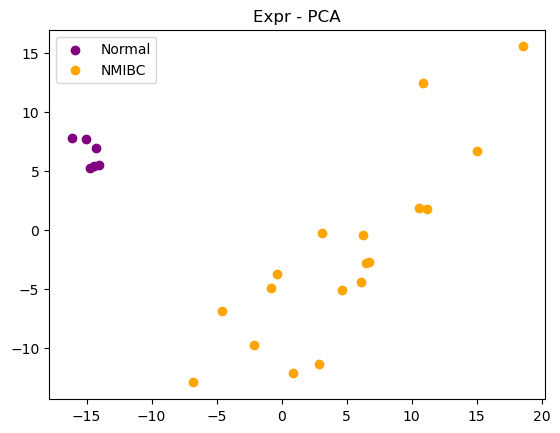

In [58]:
visualize_expr(expr.values, y.cpu().detach().numpy(), "PCA")

0
1


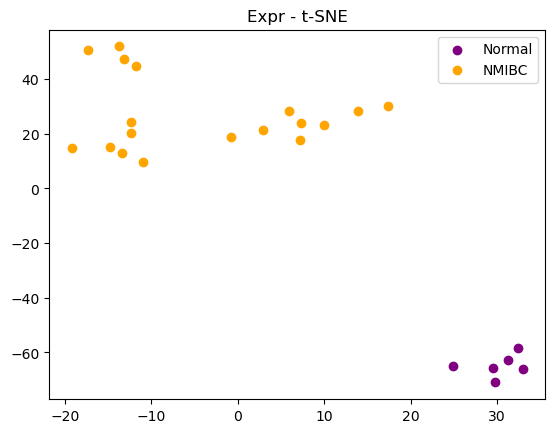

In [59]:
visualize_expr(expr.values, y.cpu().detach().numpy(), "t-SNE")

In [60]:
from adin.gaan import *

In [61]:
in_dim = expr.shape[1]
in_dim

27551

In [62]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score, f1_score, recall_score, precision_score

def plot_cm(classes, cm):

    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import itertools

    sns.set(style='white')
    fig, ax = plt.subplots()
    plt.imshow(cm, cmap = "Blues")
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize=20, length=0)

    ax.set_title('Confusion Matrix', size=24, pad=20)
    ax.set_xlabel('Predicted', size=20)
    ax.set_ylabel('Target', size=20)

    nclasses = len(classes)
    ticks = np.arange(0, nclasses, 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", size = 20,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

def validate_model(y_trues, y_preds):

    acc = accuracy_score(y_trues, y_preds)
    f1 = f1_score(y_trues, y_preds)
    specificity = recall_score(y_trues, y_preds, pos_label=0)
    sensitivity = recall_score(y_trues, y_preds)
    precision =  precision_score(y_trues, y_preds)
    aucs = roc_auc_score(y_trues, y_preds)
    auc = np.mean(aucs)


    cr = classification_report(y_trues, y_preds)
    cm = confusion_matrix(y_trues, y_preds)
    metrics = {
        "accuracy": acc,
        "f1": f1,
        "cm": cm,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "auc_score": auc,
        "precision": precision,
        "report": cr,
        "predictions": y_preds,
    }

    classes = {"Control": 0, "Cancer": 1}
    plot_cm(classes, cm)

    return metrics, "Accuracy: {} \n F1 score: {} \n Sensitivity: {} \n Specificity: {} \n ROC AUC score: {} \n Confusion Matrix: \n {} \n Classification Report: \n {} \n".format(acc, f1, sensitivity, specificity, auc, cm, cr)

In [63]:
def roc_curve_gaan(gaan_exp, data, y_test):

    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    import numpy as np
    
    fig, ax = plt.subplots(figsize=(6, 6))
    
    #gaan_exp.eval()
    plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')  # Diagonal line
    
    preds, probs = gaan_exp.predict(data, return_pred=True, return_prob = True)
    y_test = data.y.cpu().detach().numpy()
    probs = probs.cpu().detach().numpy()
    
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    
    # Plotting the ROC curve with precise data points
    plt.plot(fpr, tpr, color="blue", lw=2, label=f'ROC curve (area = {roc_auc:.5f})')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    
    metrics, toprint = validate_model(y_test, preds)
    print(toprint)


In [64]:
df

,Model name,ROC AUC,F1,Average Precision,Recall@k,Precision@k
0,GAE,0.750,0.666667,0.9000,0.875,0.875
1,GAAN,0.375,0.750000,0.7625,0.750,0.750


Test: Loss I 15.1120 | Loss O 0.3500 | 


/home/ulomoio/miniforge3/envs/adin/lib/python3.10/site-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


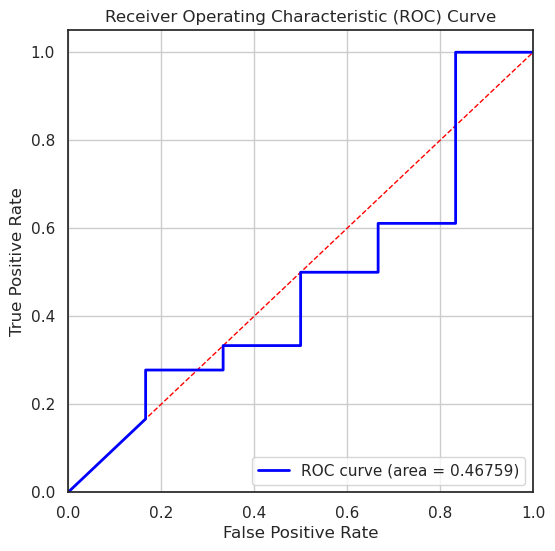

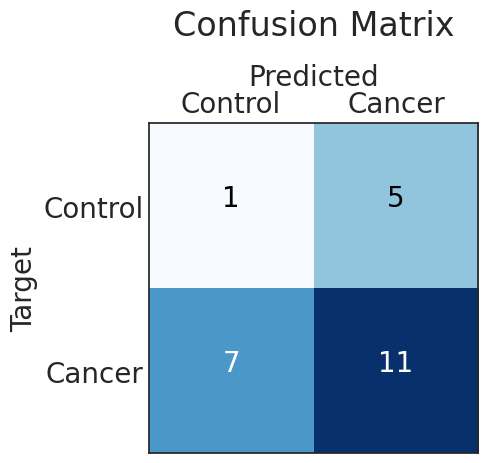

Accuracy: 0.5 
 F1 score: 0.6470588235294118 
 Sensitivity: 0.6111111111111112 
 Specificity: 0.16666666666666666 
 ROC AUC score: 0.3888888888888889 
 Confusion Matrix: 
 [[ 1  5]
 [ 7 11]] 
 Classification Report: 
               precision    recall  f1-score   support

           0       0.12      0.17      0.14         6
           1       0.69      0.61      0.65        18

    accuracy                           0.50        24
   macro avg       0.41      0.39      0.39        24
weighted avg       0.55      0.50      0.52        24
 



In [108]:
gaan = detectors["GAAN"]
gaan.model.eval()
roc_curve_gaan(gaan, data, y_test)

Node Anomaly Detection task: expecting only one convergence/divergence graph
GPU: 0
Epoch 0000: Loss I 39.4716 | Loss O 0.9406 | 
Epoch 0001: Loss I 40.8188 | Loss O 0.8265 | 
Epoch 0002: Loss I 28.5036 | Loss O 0.7875 | 
Epoch 0003: Loss I 32.0325 | Loss O 0.8983 | 
Epoch 0004: Loss I 23.3400 | Loss O 0.7732 | 
Epoch 0005: Loss I 30.1024 | Loss O 0.7041 | 
Epoch 0006: Loss I 34.3872 | Loss O 0.9615 | 
Epoch 0007: Loss I 28.9396 | Loss O 0.8824 | 
Epoch 0008: Loss I 21.8086 | Loss O 0.8291 | 


/home/ulomoio/miniforge3/envs/adin/lib/python3.10/site-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning:

Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling



Epoch 0009: Loss I 31.4791 | Loss O 0.8019 | 
Epoch 0010: Loss I 26.2895 | Loss O 0.7278 | 
Epoch 0011: Loss I 25.5100 | Loss O 0.8810 | 
Epoch 0012: Loss I 25.1723 | Loss O 0.8262 | 
Epoch 0013: Loss I 24.5271 | Loss O 0.8504 | 
Epoch 0014: Loss I 34.3417 | Loss O 0.7038 | 
Epoch 0015: Loss I 22.7089 | Loss O 0.6498 | 
Epoch 0016: Loss I 25.8392 | Loss O 0.6270 | 
Epoch 0017: Loss I 21.8926 | Loss O 0.7797 | 
Epoch 0018: Loss I 25.1311 | Loss O 0.7457 | 
Epoch 0019: Loss I 23.3074 | Loss O 0.6392 | 
Epoch 0020: Loss I 27.0259 | Loss O 0.6143 | 
Epoch 0021: Loss I 28.8102 | Loss O 0.5768 | 
Epoch 0022: Loss I 28.9796 | Loss O 0.7388 | 
Epoch 0023: Loss I 26.5084 | Loss O 0.6431 | 
Epoch 0024: Loss I 25.2238 | Loss O 0.7270 | 
Epoch 0025: Loss I 24.2350 | Loss O 0.6054 | 
Epoch 0026: Loss I 22.7259 | Loss O 0.6527 | 
Epoch 0027: Loss I 28.2494 | Loss O 0.6816 | 
Epoch 0028: Loss I 20.6679 | Loss O 0.6054 | 
Epoch 0029: Loss I 24.5887 | Loss O 0.5807 | 
Epoch 0030: Loss I 21.4093 | Loss 

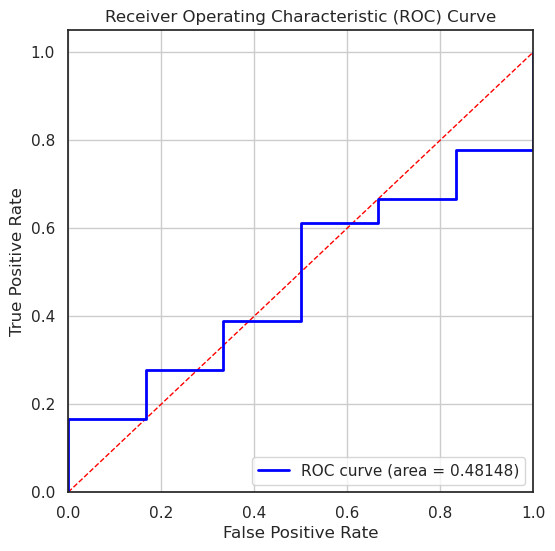

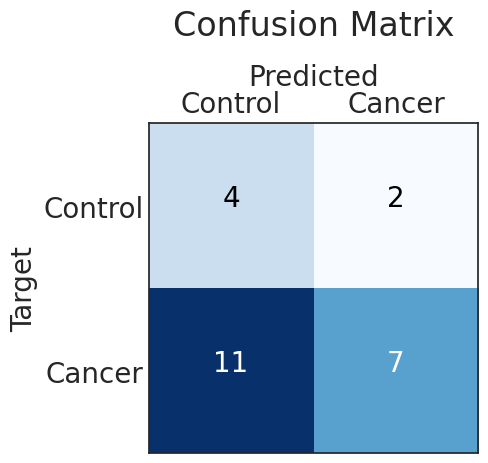

Accuracy: 0.4583333333333333 
 F1 score: 0.5185185185185185 
 Sensitivity: 0.3888888888888889 
 Specificity: 0.6666666666666666 
 ROC AUC score: 0.5277777777777778 
 Confusion Matrix: 
 [[ 4  2]
 [11  7]] 
 Classification Report: 
               precision    recall  f1-score   support

           0       0.27      0.67      0.38         6
           1       0.78      0.39      0.52        18

    accuracy                           0.46        24
   macro avg       0.52      0.53      0.45        24
weighted avg       0.65      0.46      0.48        24
 



In [222]:
class GAAN_Explainable(torch.nn.Module):
    """
    Generative Adversarial Attributed Network Anomaly Detection

    GAAN is a generative adversarial attribute network anomaly
    detection framework, including a generator module, an encoder
    module, a discriminator module, and uses anomaly evaluation
    measures that consider sample reconstruction error and real sample
    recognition confidence to make predictions. This model is
    transductive only.

    See :cite:`chen2020generative` for details.

    Parameters
    ----------
    noise_dim :  int, optional
        Input dimension of the Gaussian random noise. Defaults: ``16``.
    hid_dim :  int, optional
        Hidden dimension of model. Default: ``64``.
    num_layers : int, optional
       Total number of layers in model. A half (floor) of the layers
       are for the generator, the other half (ceil) of the layers are
       for encoder. Default: ``4``.
    dropout : float, optional
        Dropout rate. Default: ``0.``.
    weight_decay : float, optional
        Weight decay (L2 penalty). Default: ``0.``.
    act : callable activation function or None, optional
        Activation function if not None.
        Default: ``torch.nn.functional.relu``.
    backbone : torch.nn.Module
        The backbone of GAAN is fixed to be MLP. Changing of this
        parameter will not affect the model. Default: ``None``.
    contamination : float, optional
        The amount of contamination of the dataset in (0., 0.5], i.e.,
        the proportion of outliers in the dataset. Used when fitting to
        define the threshold on the decision function. Default: ``0.1``.
    lr : float, optional
        Learning rate. Default: ``0.004``.
    epoch : int, optional
        Maximum number of training epoch. Default: ``100``.
    device : str or torch.device, optional
        "cuda:i" where i is the gpu Index, or "cpu" using CPU. Default: ``cpu``.
    batch_size : int, optional
        Minibatch size, 0 for full batch training. Default: ``0``.
    num_neigh : int, optional
        Number of neighbors in sampling, -1 for all neighbors.
        Default: ``-1``.
    weight : float, optional
        Weight between reconstruction of node feature and structure.
        Default: ``0.5``.
    verbose : int, optional
        Verbosity mode. Range in [0, 3]. Larger value for printing out
        more log information. Default: ``0``.
    save_emb : bool, optional
        Whether to save the embedding. Default: ``False``.
    compile_model : bool, optional
        Whether to compile the model with ``torch_geometric.compile``.
        Default: ``False``.

    isn: bool, optional
        Whether take in input multiple Individual Specialized Networks (ISNs) rather than one convergence/divergence network.
        Using ISNs we aim to identify anomalous graphs (graph anomaly detection), while using convergence/divergence network is used to identify anomalous nodes in the graph (node anomaly detection). 
        Default: ``False``.
        
    **kwargs
        Other parameters for the backbone.

    Attributes
    ----------
    decision_score_ : torch.Tensor
        The outlier scores of the training data. Outliers tend to have
        higher scores. This value is available once the detector is
        fitted.
    threshold_ : float
        The threshold is based on ``contamination``. It is the
        :math:`N \\times` ``contamination`` most abnormal samples in
        ``decision_score_``. The threshold is calculated for generating
        binary outlier labels.
    label_ : torch.Tensor
        The binary labels of the training data. 0 stands for inliers
        and 1 for outliers. It is generated by applying
        ``threshold_`` on ``decision_score_``.
    emb : torch.Tensor or tuple of torch.Tensor or None
        The learned node hidden embeddings of shape
        :math:`N \\times` ``hid_dim``. Only available when ``save_emb``
        is ``True``. When the detector has not been fitted, ``emb`` is
        ``None``. When the detector has multiple embeddings,
        ``emb`` is a tuple of torch.Tensor.
    """

    def __init__(self,
                 in_dim,
                 noise_dim=16,
                 hid_dim=64,
                 num_layers=4,
                 dropout=0.,
                 weight_decay=0.,
                 act=F.relu,
                 backbone=None,
                 contamination=0.1,
                 lr=4e-3,
                 epoch=100,
                 device="cpu",
                 batch_size=0,
                 num_neigh=-1,
                 weight=0.5,
                 verbose=0,
                 save_emb=False,
                 compile_model=False,
                 isn = False,
                 **kwargs):


        self.noise_dim = noise_dim
        self.weight = weight

        # self.num_layers is 1 for sample one hop neighbors
        # In GAAN_Explainable, self.model_layers is for model layers
        self.model_layers = num_layers

        self.isn = isn 
        if self.isn:
            print("Graph Anomaly Detection task: expecting multiple ISNs")
        else:
            print("Node Anomaly Detection task: expecting only one convergence/divergence graph")
            
        if backbone is not None:
            warnings.warn('GAAN_Explainable can only use MLP as the backbone.')

        super(GAAN_Explainable, self).__init__()

         # split the number of layers for the encoder and decoders
        assert num_layers >= 2, \
            "Number of layers must be greater than or equal to 2."
        generator_layers = math.floor(num_layers / 2)
        encoder_layers = math.ceil(num_layers / 2)

        self.generator = MLP(in_channels=noise_dim,
                             hidden_channels=hid_dim,
                             out_channels=in_dim,
                             num_layers=generator_layers,
                             dropout=dropout,
                             act=act,
                             **kwargs).to(device)

        self.discriminator = MLP(in_channels=in_dim,
                                 hidden_channels=hid_dim,
                                 out_channels=hid_dim,
                                 num_layers=encoder_layers,
                                 dropout=dropout,
                                 act=act,
                                 **kwargs).to(device)
        self.emb = None
        self.score_func = double_recon_loss
        self.noise_dim = noise_dim
        self.device = device
        self.gpu = -1 if self.device == "cpu" else int(self.device[-1])
        self.inner = self.generator
        self.outer = self.discriminator
        self.num_layers = num_layers
        print("GPU: {}".format(self.gpu))
        if not (0. < contamination <= 0.5):
            raise ValueError("contamination must be in (0, 0.5], "
                             "got: %f" % contamination)

        self.contamination = contamination
        self.verbose = verbose
        self.decision_score_ = None

        self.weight_decay = weight_decay

        self.lr = lr
        self.epoch = epoch
        self.batch_size = batch_size
        self.gan = True
        if type(num_neigh) is int:
            self.num_neigh = [num_neigh] * self.num_layers
        elif type(num_neigh) is list:
            if len(num_neigh) != self.num_layers:
                raise ValueError('Number of neighbors should have the '
                                 'same length as hidden layers dimension or'
                                 'the number of layers.')
            self.num_neigh = num_neigh
        else:
            raise ValueError('Number of neighbors must be int or list of int')

        # other param
        self.model = None
        self.save_emb = save_emb
        if save_emb:
            self.emb = None
        self.compile_model = compile_model


    def process_graph(self, data):
        """
        Obtain the dense adjacency matrix of the graph.

        Parameters
        ----------
        data : torch_geometric.data.Data
            Input graph.
        """
        data.s = to_dense_adj(data.edge_index)[0]

    def forward(self, x):
        """
        Forward computation.

        Parameters
        ----------
        x : torch.Tensor
            Input attribute embeddings.

        Returns
        -------
        x_ : torch.Tensor
            Reconstructed node features.
        a : torch.Tensor
            Reconstructed adjacency matrix from real samples.
        a_ : torch.Tensor
            Reconstructed adjacency matrix from fake samples.
        """

        #print("base forward")

        
        noise = torch.randn(x.shape[0], self.noise_dim).to(self.device)
        x_ = self.generator(noise)

        self.emb = self.discriminator(x)
        z_ = self.discriminator(x_)

        a = torch.sigmoid((self.emb @ self.emb.T))
        a_ = torch.sigmoid((z_ @ z_.T))
        #print("end base forward")
        return x_, a, a_

    @staticmethod
    def loss_func_g(a_):
        loss_g = F.binary_cross_entropy(a_, torch.ones_like(a_))
        return loss_g

    @staticmethod
    def loss_func_ed(a, a_):
        loss_r = F.binary_cross_entropy(a, torch.ones_like(a))
        loss_f = F.binary_cross_entropy(a_, torch.zeros_like(a_))
        return (loss_f + loss_r) / 2


    def forward_model(self, data):

        #print("model forward")


        data.batch_size = self.batch_size

        if hasattr(data, 'n_id'):
          node_idx = data.n_id
        else:
          node_idx = torch.arange(len(data.x))

        data.n_id  = node_idx

        x = data.x.to(self.device)

        if hasattr(data, 's'):
          s = data.s.to(self.device)
        else:
          s = to_dense_adj(data.edge_index)[0]
          data.s = s

        edge_index = data.edge_index.to(self.device)

        x_, a, a_ = self.forward(x)

        loss_g = self.loss_func_g(a_[edge_index])
        loss_g.requires_grad_(True)
        self.opt_in.zero_grad()
        loss_g.backward()
        self.opt_in.step()

        self.epoch_loss_in += loss_g.item() * self.batch_size
        
        loss = self.loss_func_ed(a[edge_index],
                                       a_[edge_index].detach())

        score = self.score_func(x=x[:self.batch_size],
                                      x_=x_[:self.batch_size],
                                      s=s[:self.batch_size, node_idx],
                                      s_=a[:self.batch_size],
                                      weight=self.weight,
                                      pos_weight_s=1,
                                      bce_s=True)

        #print("end model forward")

        return loss, score.detach().cpu()

    def __call__(self, *args, **kwargs):
        """Make the class instance callable."""

        #print("CALL")
        x = args[0]
        edge_index = args[1]
        
        if self.isn:
            if len(args) >= 2:
                batch = args[2]
        data = Data(x=x, edge_index = edge_index, y = y)
        #self.eval()
        #pred, probs = self.predict(data, return_prob=True)
        loss, score = self.forward_model(data)
        #print("ENDCALL ", probs)
        score.requires_grad = True
        return score


    def fit(self, data, label=None):

        self.process_graph(data)
        self.num_nodes, self.in_dim = data.x.shape
        if self.batch_size == 0:
            self.batch_size = data.x.shape[0]
        loader = NeighborLoader(data,
                                self.num_neigh,
                                batch_size=self.batch_size)

        if not self.gan:
            optimizer = torch.optim.Adam(self.parameters(),
                                         lr=self.lr,
                                         weight_decay=self.weight_decay)
        else:
            self.opt_in = torch.optim.Adam(self.inner.parameters(),
                                           lr=self.lr,
                                           weight_decay=self.weight_decay)
            optimizer = torch.optim.Adam(self.outer.parameters(),
                                         lr=self.lr,
                                         weight_decay=self.weight_decay)

        self.train()
        self.decision_score_ = torch.zeros(data.x.shape[0])
        for epoch in range(self.epoch):
            start_time = time.time()
            epoch_loss = 0
            if self.gan:
                self.epoch_loss_in = 0
            for sampled_data in loader:
                batch_size = sampled_data.batch_size
                node_idx = sampled_data.n_id

                loss, score = self.forward_model(sampled_data)
                epoch_loss += loss.item() * batch_size
                if self.save_emb:
                    if type(self.emb) is tuple:
                        self.emb[0][node_idx[:batch_size]] = \
                            self.emb[0][:batch_size].cpu()
                        self.emb[1][node_idx[:batch_size]] = \
                            self.emb[1][:batch_size].cpu()
                    else:
                        self.emb[node_idx[:batch_size]] = \
                            self.emb[:batch_size].cpu()
                self.decision_score_[node_idx[:batch_size]] = score

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            loss_value = epoch_loss / data.x.shape[0]
            if self.gan:
                loss_value = (self.epoch_loss_in / data.x.shape[0], loss_value)
            logger(epoch=epoch,
                   loss=loss_value,
                   score=self.decision_score_,
                   target=label,
                   time=time.time() - start_time,
                   verbose=self.verbose,
                   train=True)

        self._process_decision_score()
        return self

    def decision_function(self, data, label=None):

        self.process_graph(data)
        loader = NeighborLoader(data,
                                self.num_neigh,
                                batch_size=self.batch_size)

        self.eval()
        outlier_score = torch.zeros(data.x.shape[0])
        if self.save_emb:
            if type(self.hid_dim) is tuple:
                self.emb = (torch.zeros(data.x.shape[0], self.hid_dim[0]),
                            torch.zeros(data.x.shape[0], self.hid_dim[1]))
            else:
                self.emb = torch.zeros(data.x.shape[0], self.hid_dim)
        start_time = time.time()
        test_loss = 0
        for sampled_data in loader:
            loss, score = self.forward_model(sampled_data)
            batch_size = sampled_data.batch_size
            node_idx = sampled_data.n_id
            if self.save_emb:
                if type(self.hid_dim) is tuple:
                    self.emb[0][node_idx[:batch_size]] = \
                        self.emb[0][:batch_size].cpu()
                    self.emb[1][node_idx[:batch_size]] = \
                        self.emb[1][:batch_size].cpu()
                else:
                    self.emb[node_idx[:batch_size]] = \
                        self.emb[:batch_size].cpu()

            test_loss = loss.item() * batch_size
            outlier_score[node_idx[:batch_size]] = score

        loss_value = test_loss / data.x.shape[0]
        if self.gan:
            loss_value = (self.epoch_loss_in / data.x.shape[0], loss_value)

        logger(loss=loss_value,
               score=outlier_score,
               target=label,
               time=time.time() - start_time,
               verbose=self.verbose,
               train=False)
        return outlier_score

    def predict(self,
                data=None,
                label=None,
                return_pred=True,
                return_score=False,
                return_prob=False,
                prob_method='linear',
                return_conf=False):
        """Prediction for testing data using the fitted detector.
        Return predicted labels by default.

        Parameters
        ----------
        data : torch_geometric.data.Data, optional
            The testing graph. If ``None``, the training data is used.
            Default: ``None``.
        label : torch.Tensor, optional
            The optional outlier ground truth labels used for testing.
            Default: ``None``.
        return_pred : bool, optional
            Whether to return the predicted binary labels. The labels
            are determined by the outlier contamination on the raw
            outlier scores. Default: ``True``.
        return_score : bool, optional
            Whether to return the raw outlier scores.
            Default: ``False``.
        return_prob : bool, optional
            Whether to return the outlier probabilities.
            Default: ``False``.
        prob_method : str, optional
            The method to convert the outlier scores to probabilities.
            Two approaches are possible:

            1. ``'linear'``: simply use min-max conversion to linearly
            transform the outlier scores into the range of
            [0,1]. The model must be fitted first.

            2. ``'unify'``: use unifying scores,
            see :cite:`kriegel2011interpreting`.

            Default: ``'linear'``.
        return_conf : boolean, optional
            Whether to return the model's confidence in making the same
            prediction under slightly different training sets.
            See :cite:`perini2020quantifying`. Default: ``False``.

        Returns
        -------
        pred : torch.Tensor
            The predicted binary outlier labels of shape :math:`N`.
            0 stands for inliers and 1 for outliers.
            Only available when ``return_label=True``.
        score : torch.Tensor
            The raw outlier scores of shape :math:`N`.
            Only available when ``return_score=True``.
        prob : torch.Tensor
            The outlier probabilities of shape :math:`N`.
            Only available when ``return_prob=True``.
        conf : torch.Tensor
            The prediction confidence of shape :math:`N`.
            Only available when ``return_conf=True``.
        """

        is_fitted(self, ['decision_score_', 'threshold_', 'label_'])

        output = ()
        if data is None:
            score = self.decision_score_
            logger(score=self.decision_score_,
                   target=label,
                   verbose=self.verbose,
                   train=False)
        else:
            score = self.decision_function(data, label)
        if return_pred:
            pred = (score > self.threshold_).long()
            output += (pred,)
        if return_score:
            output += (score,)
        if return_prob:
            prob = self._predict_prob(score, prob_method)
            output += (prob,)
        if return_conf:
            conf = self._predict_conf(score)
            output += (conf,)

        if len(output) == 1:
            return output[0]
        else:
            return output



    def _predict_prob(self, score, method='linear'):
        """Predict the probabilities of being outliers. Two approaches
        are possible:

        'linear': simply use min-max conversion to linearly
                  transform the outlier scores into the range of
                  [0,1]. The model must be fitted first.

        'unify': use unifying scores,
                 see :cite:`kriegel2011interpreting`.

        Parameters
        ----------
        score : torch.Tensor
            The outlier scores of shape :math:`N`.

        method : str
            probability conversion method. It must be one of
            'linear' or 'unify'. Default: ``linear``.

        Returns
        -------
        prob : torch.Tensor
            The outlier probabilities of shape :math:`N`.
        """

        if method == 'linear':
            train_score = self.decision_score_
            prob = score - train_score.min()
            prob /= train_score.max() - train_score.min()
            prob = prob.clamp(0, 1)
        elif method == 'unify':
            mu = torch.mean(self.decision_score_)
            sigma = torch.std(self.decision_score_)
            pre_erf_score = (score - mu) / (sigma * np.sqrt(2))
            erf_score = erf(pre_erf_score)
            prob = erf_score.clamp(0, 1)
        else:
            raise ValueError(method,
                             'is not a valid probability conversion method')
        return prob

    def _predict_conf(self, score):
        """Predict the model's confidence in making the same prediction
        under slightly different training sets.
        See :cite:`perini2020quantifying`.

        Parameters
        ----------
        score : torch.Tensor
            The outlier score of shape :math:`N`.

        Returns
        -------
        conf : torch.Tensor
            The prediction confidence of shape :math:`N`.
        """

        n = len(self.decision_score_)
        k = n - int(n * self.contamination)

        n_ins = (self.decision_score_.view(n, 1) <= score).count_nonzero(dim=0)

        # Derive the outlier probability using Bayesian approach
        post_prob = (1 + n_ins) / (2 + n)

        # Transform the outlier probability into a confidence value
        conf = torch.Tensor(1 - binom.cdf(k, n, post_prob))

        pred = (score > self.threshold_).long()
        conf = torch.where(pred == 0, 1 - conf, conf)
        return conf

    def _process_decision_score(self):
        """Internal function to calculate key attributes:
        - threshold_: used to decide the binary label
        - label_: binary labels of training data
        """

        self.threshold_ = np.percentile(self.decision_score_,
                                        100 * (1 - self.contamination))
        self.label_ = (self.decision_score_ > self.threshold_).long()

    def __repr__(self):

        class_name = self.__class__.__name__
        init_signature = signature(self.__init__)
        parameters = [p for p in init_signature.parameters.values()
                      if p.name != 'self' and p.kind != p.VAR_KEYWORD]
        params = {}
        for key in sorted([p.name for p in parameters]):
            params[key] = getattr(self, key, None)
        return '%s(%s)' % (class_name, pprint(params, offset=len(class_name)))

gaan_exp = GAAN_Explainable(in_dim, noise_dim=noise_dim, hid_dim=h_dim, num_layers=num_layers, batch_size = batch_size, dropout=dropout, device="cuda:0", backbone=None, contamination=contamination, lr=learning_rate, epoch=epoch, verbose=verbose, act=act, weight = weight, weight_decay=weight_decay)
gaan_exp.fit(train_data)
roc_curve_gaan(gaan_exp, data, y_test)

In [223]:
output = gaan_exp(data.x, data.edge_index)
print(output.requires_grad)  # Should be True

True


In [225]:
from torch_geometric.explain import Explainer, GNNExplainer

explainer = Explainer(
    model=gaan_exp,
    algorithm=GNNExplainer(epochs=100, lr = 0.0001),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='binary_classification',
        task_level='node',
        return_type='raw',
    ),
)

explanation = explainer(data.x, data.edge_index, index = 0)
print(f'Generated explanations in {explanation.available_explanations}')

path = 'feature_importance.png'
explanation.visualize_feature_importance(path, top_k=10, feat_labels = expr.columns)
print(f"Feature importance plot has been saved to '{path}'")

path = 'subgraph.pdf'
explanation.visualize_graph(path, node_labels= expr.index)
print(f"Subgraph visualization plot has been saved to '{path}'")

ValueError: Could not compute gradients for node features. Please make sure that node features are used inside the model or disable it via `node_mask_type=None`.

In [140]:
preds = gaan_exp.predict(data)

Test: Loss I 363.3764 | Loss O 7.5231 | 


/home/ulomoio/miniforge3/envs/adin/lib/python3.10/site-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


In [141]:
from sklearn.metrics import roc_auc_score

In [142]:
genes = list(expr.columns)
genes[:10]

['ATP2A1',
 'SLMAP',
 'MEOX2',
 'HOXD3',
 'ZNF398',
 'PANX1',
 'COX8C',
 'IMPA2',
 'TTC8',
 'FLJ35816']

In [143]:
#!pip install nbformat>=4.2.0

In [144]:
import plotly.graph_objects as go
import plotly.express as px 

def plotly_featureimportance_from_gnnexplainer(node_id, genes, top_k = 10):

    explanation = explainer(data.x, data.edge_index, index = node_id)
    
    node_mask = explanation.get('node_mask')
    if node_mask is None:
        raise ValueError(f"The attribute 'node_mask' is not available "
                                 f"in '{explanation.__class__.__name__}' "
                                 f"(got {explanation.available_explanations})")
    if node_mask.dim() != 2 or node_mask.size(1) <= 1:
                raise ValueError(f"Cannot compute feature importance for "
                                 f"object-level 'node_mask' "
                                 f"(got shape {node_mask.size()})")
    
    importances = node_mask.sum(dim=0).cpu().detach().numpy()

    # Create a DataFrame for gene importances
    feature_importances = pd.DataFrame({
        'Gene': genes,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Select the top 10 most important genes
    top_genes = feature_importances.head(top_k)

    # Create an interactive bar plot using Plotly Express
    fig = px.bar(top_genes, x='Importance', y='Gene', 
                 orientation='h',  # Horizontal bar plot
                 title='Top 10 Most Important Genes',
                 labels={'Importance': 'Importance Score', 'Gene': 'Gene'},
                 color='Importance',
                 color_continuous_scale='viridis')

    # Update layout for better presentation
    fig.update_layout(
        xaxis_title="Importance Score",
        yaxis_title="Gene",
        width=800,
        height=400,
        template='plotly_white'
    )

    return fig

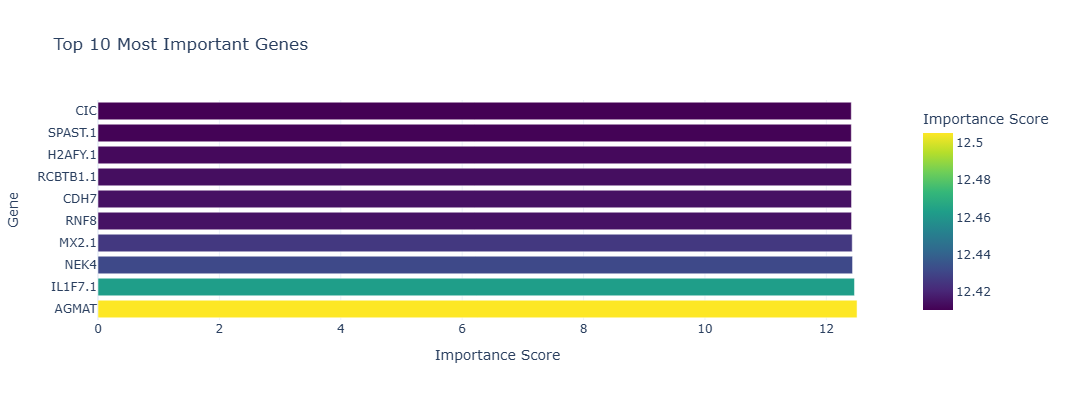

In [204]:
fig_expnode = plotly_featureimportance_from_gnnexplainer(explanation, genes, top_k = 10)
fig_expnode

In [400]:
#!pip install dash_cytoscape

In [252]:
import json 
patients = list(expr.index)
patients 

['GSM928410',
 'GSM928411',
 'GSM928412',
 'GSM928413',
 'GSM928414',
 'GSM928415',
 'GSM928416',
 'GSM928417',
 'GSM928418',
 'GSM928419',
 'GSM928420',
 'GSM928421',
 'GSM928422',
 'GSM928423',
 'GSM928424',
 'GSM928425',
 'GSM928426',
 'GSM928427',
 'GSM928428',
 'GSM928429',
 'GSM928430',
 'GSM928431',
 'GSM928432',
 'GSM928433']

In [253]:
map_final = {0: "Control", 1: "Anomalous"}

In [254]:
nodes = []
for i, patient in enumerate(patients):
    target = map_final[y[i].item()]
    pred = map_final[preds[i].item()]  
    nodes.append({'data': {'id': patient, 'label': patient, 'prediction': pred, 'classes': target}, 'classes': target})
nodes[:5]

[{'data': {'id': 'GSM928410',
   'label': 'GSM928410',
   'prediction': 'Control',
   'classes': 'Control'},
  'classes': 'Control'},
 {'data': {'id': 'GSM928411',
   'label': 'GSM928411',
   'prediction': 'Control',
   'classes': 'Control'},
  'classes': 'Control'},
 {'data': {'id': 'GSM928412',
   'label': 'GSM928412',
   'prediction': 'Anomalous',
   'classes': 'Control'},
  'classes': 'Control'},
 {'data': {'id': 'GSM928413',
   'label': 'GSM928413',
   'prediction': 'Control',
   'classes': 'Control'},
  'classes': 'Control'},
 {'data': {'id': 'GSM928414',
   'label': 'GSM928414',
   'prediction': 'Anomalous',
   'classes': 'Control'},
  'classes': 'Control'}]

In [255]:
edge_list[:5]

[('GSM928410', 'GSM928410'),
 ('GSM928410', 'GSM928411'),
 ('GSM928410', 'GSM928412'),
 ('GSM928410', 'GSM928413'),
 ('GSM928410', 'GSM928414')]

In [256]:
edges = []
for i, edge in enumerate(edge_list):
    patient1, patient2 = edge
    weight = edge_weights[i]
    if patient1 != patient2:
        edges.append({'data': {'source': patient1, 'target': patient2, 'weight': weight.item()}})
edges[-5:]

[{'data': {'source': 'GSM928431',
   'target': 'GSM928428',
   'weight': 0.9501838684082031}},
 {'data': {'source': 'GSM928431',
   'target': 'GSM928429',
   'weight': 0.9350849986076355}},
 {'data': {'source': 'GSM928432',
   'target': 'GSM928418',
   'weight': 0.9340389966964722}},
 {'data': {'source': 'GSM928432',
   'target': 'GSM928423',
   'weight': 0.9300089478492737}},
 {'data': {'source': 'GSM928432',
   'target': 'GSM928430',
   'weight': 0.9343409538269043}}]

In [315]:
import dash_cytoscape as cyto
from dash import Dash, html, Input, Output, State, callback, dcc

app = Dash(__name__)

default_stylesheet = [
    {
        'selector': 'node',
        'style': {
            'content': 'data(label)'
         }
    },
    {
        'selector': 'edge',
        'style': {
            'line-color': '#A3C4BC'
        }
    },
      # Class selectors
    {
        'selector': '.Anomalous',
            'style': {
                'background-color': 'red',
            }
        },
        {
            'selector': '.Control',
                'style': {
                    'background-color': 'green',
            }
        }
]

styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}

@callback(Output('network', 'layout'),
              Input('dropdown-update-layout', 'value'))
def update_layout(layout):
    return {
        'name': layout,
        'animate': True
    }

@callback(Output('network', 'elements'),
         Input('btn-add-node', 'n_clicks_timestamp'),
         Input('btn-remove-node', 'n_clicks_timestamp'),
         State('network', 'elements'),
         prevent_initial_call = True)
def update_elements(btn_add, btn_remove, elements):
    current_nodes, deleted_nodes = get_current_and_deleted_nodes(elements)
    # If the add button was clicked most recently and there are nodes to add
    if int(btn_add) > int(btn_remove) and len(deleted_nodes):

        # We pop one node from deleted nodes and append it to nodes list.
        current_nodes.append(deleted_nodes.pop())
        # Get valid edges -- both source and target nodes are in the current graph
        cy_edges = get_current_valid_edges(current_nodes, edges)
        return cy_edges + current_nodes

    # If the remove button was clicked most recently and there are nodes to remove
    elif int(btn_remove) > int(btn_add) and len(current_nodes):
            current_nodes.pop()
            cy_edges = get_current_valid_edges(current_nodes, edges)
            return cy_edges + current_nodes

    # Neither have been clicked yet (or fallback condition)
    return elements

def get_current_valid_edges(current_nodes, all_edges):
    """Returns edges that are present in Cytoscape:
    its source and target nodes are still present in the graph.
    """
    valid_edges = []
    node_ids = {n['data']['id'] for n in current_nodes}

    for e in all_edges:
        if e['data']['source'] in node_ids and e['data']['target'] in node_ids:
            valid_edges.append(e)
    return valid_edges

def get_current_and_deleted_nodes(elements):
    """Returns nodes that are present in Cytoscape and the deleted nodes
    """
    current_nodes = []
    deleted_nodes = []

    # get current graph nodes
    for ele in elements:
        # if the element is a node
        if 'source' not in ele['data']:
            current_nodes.append(ele)

    # get deleted nodes
    node_ids = {n['data']['id'] for n in current_nodes}
    for n in nodes:
        if n['data']['id'] not in node_ids:
            deleted_nodes.append(n)

    return current_nodes, deleted_nodes


@callback(Output('cytoscape-tapEdgeData-json', 'children'),
          Input('network', 'tapEdgeData'),
          prevent_initial_call = True)
def displayTapEdgeData(data):
    if data:
        return "You recently clicked/tapped the edge between " + \
               data['source'].upper() + " and " + data['target'].upper() + " with weight: " + str(data['weight'])
    else:
        return "Click one edge to visualize its information"

In [316]:
#on click node: show explainability results
app.layout = html.Div([
    dcc.Dropdown(
        id='dropdown-update-layout',
        value='grid',
        clearable=False,
        options=[
            {'label': name.capitalize(), 'value': name}
            for name in ['grid', 'random', 'circle', 'cose', 'concentric', 'breadthfirst']
        ]
    ),
    html.Div([
        html.Button('Add Node', id='btn-add-node', n_clicks_timestamp=0),
        html.Button('Remove Node', id='btn-remove-node', n_clicks_timestamp=0)
    ]),
    html.P("Network:"),
    cyto.Cytoscape(
        id='network',
        elements=edges+nodes,
        layout={'name': 'breadthfirst'},
        style={'width': '800px', 'height': '300px'},
        stylesheet=default_stylesheet,
        responsive=True
    ),
    html.Pre(id='cytoscape-tapNodeData-json', children = "Click one node get more information", style=styles['pre']),
    html.Pre(id='cytoscape-tapEdgeData-json', children = "Click one edge to visualize its information", style=styles['pre']),
    dcc.Graph(
            id='exp-node', 
    ),
    html.P("Subgraph:"),
    cyto.Cytoscape(
        id='subnetwork',
        elements=edges+nodes,
        layout={'name': 'breadthfirst'},
        style={'width': '400px', 'height': '400px'},
        stylesheet=default_stylesheet,
        responsive=True
    ),
])

In [317]:
def get_subgraph(node_data, nodes, edges):
    node = node_data["id"]
    nodes_adj = [{"data": node_data}]
    edges_adj = []
    nodes_idxs = [node["data"]["id"] for node in nodes]
    nodes_idxs = np.array(nodes_idxs)
        
    for i, edge in enumerate(edges):
        #print(i+1, "/", len(edges), end = "\r")
        node1 = edge["data"]["source"]
        node2 = edge["data"]["target"]
        if node1 == node or node2 == node:
            edges_adj.append(edge)

    for i, edge in enumerate(edges_adj):
        #print(i+1, "/", len(edges_adj), end = "\r")
        node1 = edge["data"]["source"]
        node2 = edge["data"]["target"]
        if node1 != node:
            node1_idx = np.argwhere(nodes_idxs == node1)[0][0]
            node1_data = nodes[node1_idx]
            nodes_adj.append(node1_data)
        elif node2 != node:
            node2_idx = np.argwhere(nodes_idxs == node2)[0][0]
            node2_data = nodes[node2_idx]
            nodes_adj.append(node2_data)

    print(len(nodes_adj), len(nodes))
    print(len(edges_adj), len(edges))
    elements = nodes_adj + edges_adj 
    return elements

In [318]:
get_subgraph(nodes[4]["data"], nodes, edges)

11 24
10 176


[{'data': {'id': 'GSM928414',
   'label': 'GSM928414',
   'prediction': 'Anomalous',
   'classes': 'Control'}},
 {'data': {'id': 'GSM928410',
   'label': 'GSM928410',
   'prediction': 'Control',
   'classes': 'Control'},
  'classes': 'Control'},
 {'data': {'id': 'GSM928411',
   'label': 'GSM928411',
   'prediction': 'Control',
   'classes': 'Control'},
  'classes': 'Control'},
 {'data': {'id': 'GSM928412',
   'label': 'GSM928412',
   'prediction': 'Anomalous',
   'classes': 'Control'},
  'classes': 'Control'},
 {'data': {'id': 'GSM928413',
   'label': 'GSM928413',
   'prediction': 'Control',
   'classes': 'Control'},
  'classes': 'Control'},
 {'data': {'id': 'GSM928410',
   'label': 'GSM928410',
   'prediction': 'Control',
   'classes': 'Control'},
  'classes': 'Control'},
 {'data': {'id': 'GSM928411',
   'label': 'GSM928411',
   'prediction': 'Control',
   'classes': 'Control'},
  'classes': 'Control'},
 {'data': {'id': 'GSM928412',
   'label': 'GSM928412',
   'prediction': 'Anomalous

In [319]:
@callback(Output('exp-node', 'figure'),
          Input('network', 'tapNodeData'),
          prevent_initial_call = True
          )
def updateExpOnTapNode(node_data):

    global edges 
    global nodes 
    global genes 
    global node_mapping 
    
    if node_data:

        node = node_data["id"]
        id = node_mapping[node]
        fig = plotly_featureimportance_from_gnnexplainer(id, genes)
        return fig

@callback(
          Output('subnetwork', 'elements'),
          Input('network', 'tapNodeData'),
          prevent_initial_call = True
          )
def updateSubgraphOnTapNode(node_data):

    global edges 
    global nodes 
    global genes 
    global node_mapping 
    
    if node_data:

        node = node_data["id"]
        elements = get_subgraph(node_data, nodes, edges)
        return elements

@callback(Output('cytoscape-tapNodeData-json', 'children'),
          Input('network', 'tapNodeData'),
          prevent_initial_call = True
          )
def displayTextOnTapNode(node_data):
    if node_data:
        text = json.dumps(node_data, indent=2)
    else:
        text = json.dumps('Click a node to get more information')
    return text

In [320]:
app.run_server(debug=True)

CALL
13 24
12 176
Test: Loss I 1374.9580 | Loss O 4.1667 | 
ENDCALL  tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 0.2975, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [27]:
def open_file_geo(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()
        skip_lines = None
        for idx, line in enumerate(lines):
            if line.split("\t")[0] == "\n" and len(line.split("\t")) == 1:
                skip_lines = idx
                break
    return skip_lines

In [31]:
open_file_geo('use_case/data/bladder_cancer/GSE37817-GPL8490_series_matrix.csv')

28

In [33]:
open_file_geo('use_case/data/celiac/GSE11501_series_matrix.txt')

33

In [35]:
open_file_geo('use_case/data/breast_cancer/GSE27562_series_matrix.txt')

30